In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# converting job_skills to a list
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

c:\Users\ekene\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ekene\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Nov 11 21:27:20 2024).


COUNTS OF JOB SKILLS IN JOB POSTING (PLOTTING MULTIPLE GRAPHS IN ONE FIGURE)


In [2]:
df_skills = df.copy()

In [4]:
skills_explode = df_skills.explode('job_skills')

In [10]:
df_skills_count = skills_explode.groupby(['job_title_short', 'job_skills']).size().reset_index(name= 'skills_count').sort_values(by='skills_count', ascending= False)

In [11]:
df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [15]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

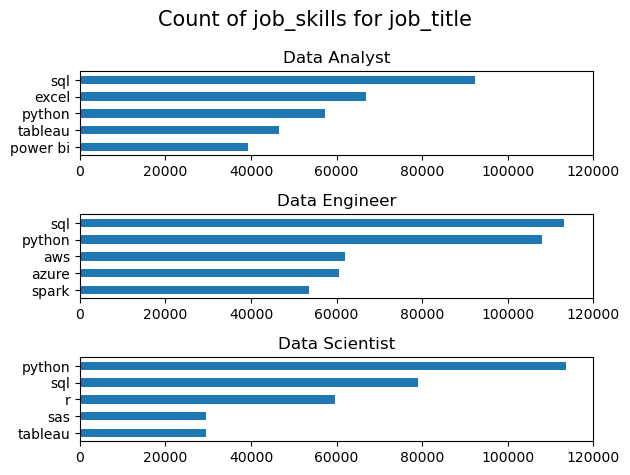

In [32]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind= 'barh', x= 'job_skills', y= 'skills_count', ax= ax[i], title= job_title )
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,120000)
    ax[i].legend().set_visible(False)
    
fig.suptitle('Count of job_skills for job_title', fontsize= 15)
fig.tight_layout()    
